In [1]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lon1,lat1 = -109.83007049344715, 44.36470033197011
lon2,lat2 = -109.7513685303535, 44.29673563882564
# lon1,lat1 = 77.28112208857522,32.135432817449384
# lon2,lat2 = 77.62169826045022,31.94918029751246
resolution = 30

In [3]:
elevation_map=getGrayLevelMatrix(lon1,lat1,lon2,lat2,resolution)
print("")

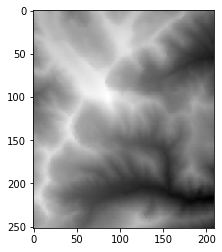

In [4]:
plt.imshow(elevation_map,cmap='gray')
plt.show()

In [5]:
print("Elevation Map Info")
print(f"Gray Map Shape: {elevation_map.shape}")
print(f"Min: {elevation_map.min()}")
print(f"Max: {elevation_map.max()}")

Elevation Map Info
Gray Map Shape: (252, 209)
Min: 2411
Max: 3670


In [6]:

n,m = elevation_map.shape

src_lon,src_lat = -109.81884898177093,44.32480359458633
des_lon,des_lat = -109.77537406272984,44.30294042398075

src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)



In [7]:

bin_map_start = initBinMap(src_latIdx,src_lonIdx,n,m)   
bin_map_end = initBinMap(des_latIdx,des_lonIdx,n,m)

In [8]:
isConvergedFlag = False
accuracy=0.0000001
while isConvergedFlag==False:
    prev_bin_map_start = deepcopy(bin_map_start)
    prev_bin_map_end = deepcopy(bin_map_end)
    applyDistTf(elevation_map,bin_map_start,bin_map_end,4)
    isConvergedFlag=isConverged(prev_bin_map_start,bin_map_start,accuracy)
    



Applying Distance transform......Done!
Applying Distance transform......Done!
Applying Distance transform......Done!
Applying Distance transform......Done!
Applying Distance transform......Done!
Applying Distance transform......Done!
Applying Distance transform......Done!
Applying Distance transform......Done!
Applying Distance transform......Done!


In [9]:
# applyDistTf(elevation_map,bin_map_start,bin_map_end,30)

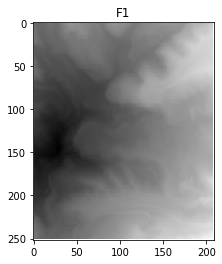

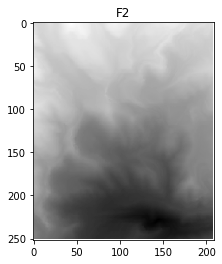

In [10]:
plt.imshow(bin_map_start,cmap='gray')
plt.title("F1")
plt.show()

plt.imshow(bin_map_end,cmap='gray')
plt.title("F2")
plt.show()

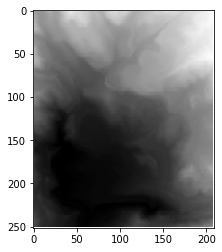

In [11]:
combined_bin_map=combineBinmap(bin_map_start,bin_map_end)
plt.imshow(combined_bin_map,cmap='gray')
plt.show()

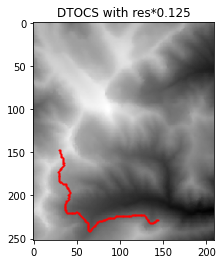

In [12]:
showPathDTf(elevation_map,np.array(combined_bin_map))

In [12]:
# showRasterMap(combined_bin_map)

In [13]:
gray_map_copy=deepcopy(elevation_map)


In [14]:
np_bin_combined=np.array(combined_bin_map)
n,m=np_bin_combined.shape
minval = np_bin_combined.min()
print(minval)

1105.2649615436223


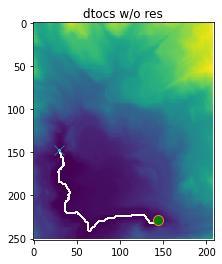

In [15]:
for i in range(n):
    for j in range(m):
        if np_bin_combined[i][j]!=math.inf and  round(np_bin_combined[i][j],11)==round(minval,11):
        # if np_bin_combined[i][j]!=math.inf and  np_bin_combined[i][j]==minval:
            np_bin_combined[i][j]=math.inf

plt.imshow(np_bin_combined)
plt.plot([src_lonIdx], [src_latIdx], marker="x", markersize=10, markerfacecolor="green")
plt.plot([des_lonIdx], [des_latIdx], marker="o", markersize=10, markerfacecolor="green")
plt.title("dtocs w/o res")
plt.show()

why we need round